# Grundlagen 2: Ausgleichs-Polynome

Das im Beitrag zur Linearen Regressionen beschriebene Verfahren lässt sich leicht auf Polynome höheren Grades übertragen. Dies liegt an der einfachen "standardisierten" Form dieser Sorte Funktionen. Ein Polynom vom Grad $n$ hat die Gestalt $$P(x) = \sum_{j=0}^n a_j x^j = a_0 + a_1x + a_x^2 + \ldots + a_n x^n.$$
Unsere Distanzfunktion hat zu gegebenen $N$ Wertepaaren $x_k, y_k$ dann die einfache Gestalt
$$D(P) = P(a_j) = \sum_{k=1}^N (\sum_{j=0}^n (a_j x_k^j) - y_k)^2.$$
Wie im linearen Fall suchen wir nun das Polynom $P$ und damit Koeffizienten $a_0,a_1,\ldots,a_n$, so dass $D$ minimal ist. Für diese Koeffizienten $a_j$ muss der Gradient von $D$ verschwinden, d.h. $\nabla D (a_k) = 0$. Die Berechnung dieses Gradienten ist aber wegen der Struktur der Polynome recht einfach, und es muss für alle $m=0,1,\ldots,n$ gelten:
$$ \frac{\partial D}{\partial a_m} = \sum_{k=1}^N 2x_k^m (\sum_{j=0}^n (a_jx_k^j) -y_k) = 0$$
Wir können die Konstante 2 streichen, bringen die von $a_j$ unabhängigen Terme auf die rechte Seite und sortieren die Summen um. Wir erhalten $n+1$ Gleichungen für die Koeffizienten des Polynoms:
$$\sum_{j=0}^n (\sum_{k=1}^N x_k^{j+m}) a_j = \sum_{k=1}^N x_k^m y_k \;\;\; \text{für}\; m = 1,\dots, n.$$
Die ist ein affines Gleichungssystem der Gestalt $A a = b$ mit Koeffizienten
$$A = (a_{ik}) = (\sum_{j=1}^N x_n^{ik}), b = (b_i) = \sum_{n=1}^N x_n^i y_n.$$

Dieses Gleichungssystem besitzt eine eindeutige Lösung (Pathologien betrachten wir nicht), und die Python-Bibliothek __NumPy__ besitzt im Bereich der Linearen Algebra eine entsprechende Funktion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementierung der Berechnung der Ausgleichs-Polynome

In [2]:
def koeffizienten(x:np.ndarray,y:np.ndarray,N:int):
    """
    Berechnet die Koeffizienten des Gleichungssystems zur Bestimmung des
    optimalen Polynoms.
    x: Die x-Werte
    y: Die y-Werte
    n: Der Grad des Polynoms
    """
    
    # Die Koeffizienten der linken Seite des Gleichungssystems
    A = np.array([[np.sum(x**(n+k)) for k in range(N+1)] for n in range(N+1) ])
    # Die rechte Seite des Gleichungssystems
    b = np.array([np.sum(x**n *y) for n in range(N+1)])
    return A,b

def poly_reg(x:np.ndarray,y:np.ndarray,N:int):
    """Die Berechnung der Polynomialen Regression."""
    A,b = koeffizienten(x,y,N)
    return np.linalg.solve(A,b)

def poly_gen(a:np.ndarray):
    """Erzeugt ein Polynom mit den Koeffizienten aus a"""
    return (lambda x: np.sum([a * x**k for k,a in enumerate(a)]))

def D(x:np.ndarray,y:np.ndarray,f):
    """Die Distanzfunktion berechnet die Fehlerquadratsumme"""
    return np.sum((f(x) - y)**2) 


### Einige Hilfsfunktionen zur Arbeit mit Polynomen

In [3]:
def poly_text(cff):
    """
    Ausgabe des Polynoms in Text-Form.
    """
    comp = []
    text = "P(x) = "
    for n,a in enumerate(cff):   
        c = "{:.3f}".format(a)
        if n > 0:
            c += "x"
        if n > 1:
            c += "^" + str(n)
        comp.append(c)

    comp.reverse()
    for c in comp:
        text += c + " + "
    text = text[:-3]
    return text

def poly_plot(x,y,a):
    
    plt.figure( figsize=(6, 4))
    plt.ylim(min(0,np.min(y) - 3),np.max(y)+3)
    plt.xlabel('$x$')
    plt.ylabel('$P(x)$')
    plt.title(poly_text(a))
    plt.grid(True)
    plt.scatter(x,y,color='red')
    P = poly_gen(a)
    xp = np.linspace(np.min(x),np.max(x),100)
    yp = [P(x) for x in xp]
    plt.plot(xp,yp) 

### Unser Standardbeispiel mit drei Punkten

In [4]:
beispiel = np.array([1,3,6]),np.array([5,10,13])

### Der Spezialfall N=1 $\rightarrow$ Die Lineare Regression

Wir betrachten noch einmal unser Beispiel aus der Linearen Regression und überprüfen, ob dasselbe Ergebnis harauskommt.

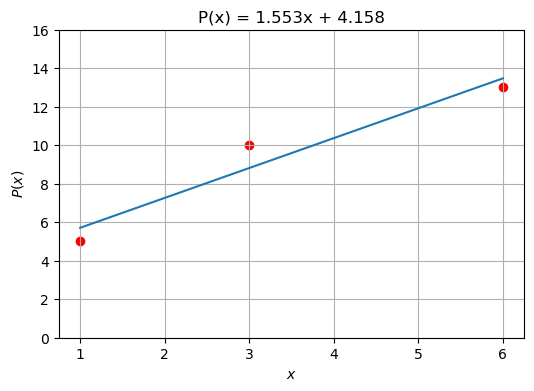

In [5]:
x, y = beispiel

a = poly_reg(x,y,1)
#P = poly_gen(a)
#x1 = np.linspace(0,6,20)
#y1 = [P(xk) for xk in x1 ]

poly_plot(x,y,a)
plt.show()

## Quadratische Polynome

### Drei Punkte lassen sich durch ein Polynom 2. Grades perfekt verbinden

Verwenden wir Polynome vom Grad höher als 1, so lassen sich die Punkte noch besser approximieren. Allgemein können wir $N$ Punkte durch ein Polynom vom Grad $N-1$ exakt verbinden. 
Unsere drei Punkte sollten sich also durch ein quadratsches Polynom verbinden lassen. Das Prinzip ist dasselbe: Die Minimierung der Distanzfunktion führt auf ein Gleichungssystem für die Koeffizienten des Polynoms.

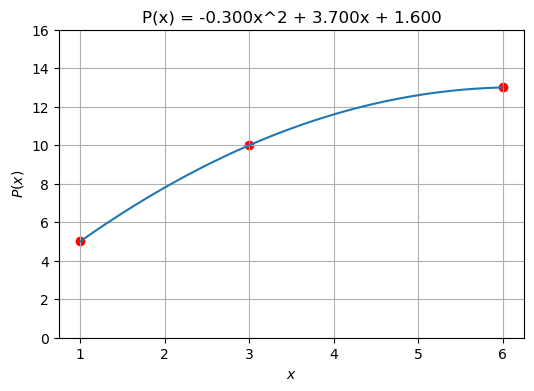

In [6]:
x,y = beispiel

a = poly_reg(x,y,2)
P = poly_gen(a)

x1 = np.linspace(0,6,20)
y1 = [P(xk) for xk in x1 ]

poly_plot(x,y,a)
plt.show()

### Polynome höheren Grades

Tatsächlich zeigt die Analysis, dass sich alle ("glatten") Funktionen **in einem begrenzten Bereich** beliebig genau durch Polynome approximieren lassen ([s. "Taylorreihe" bei Wikipedia](https://de.wikipedia.org/wiki/Taylorreihe)). Erst dadurch sind Berechnungen von Funktionen wie Sinus oder Exponential-Funktion durch Computer erst möglich, da diese nur addieren und multiplizieren konnen. Wir approximieren hier einmal eine Sinusfunktion durch ein Polynome.

<Figure size 800x560 with 0 Axes>

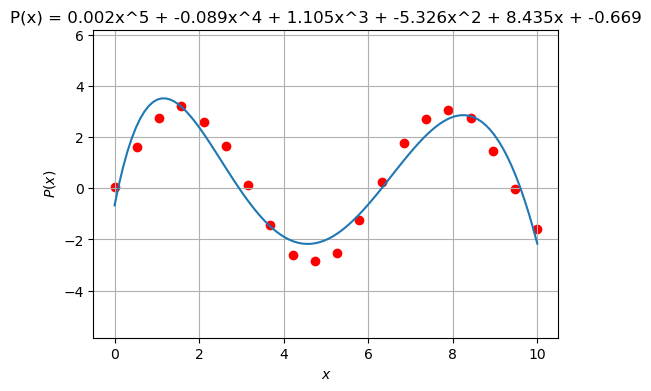

In [7]:
N=20
x = np.linspace(0,10,N)
y = [-3 * x*x + 2*x+3 for x in x]
y = [3*np.sin(x) for x in x]
y += 0.2*np.random.rand(N)

grad=5
a = poly_reg(x,y,grad)
P = poly_gen(a)

plt.figure( figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
poly_plot(x,y,a)
